In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os 

In [2]:
os.getcwd()

'c:\\Users\\DELL\\AppData\\Local\\Programs\\Microsoft VS Code'

In [3]:
os.chdir('C:\\Users\\DELL\\datasets')

In [4]:
dataset=pd.read_csv('Fraud.csv')

In [5]:
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
dataset.corr

<bound method DataFrame.corr of          step      type      amount     nameOrig  oldbalanceOrg   
0           1   PAYMENT     9839.64  C1231006815      170136.00  \
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud   
0             160296.36  M1979787155            0.00            0.00        0  \
1

In [7]:
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
dataset['step'].unique

<bound method Series.unique of 0            1
1            1
2            1
3            1
4            1
          ... 
6362615    743
6362616    743
6362617    743
6362618    743
6362619    743
Name: step, Length: 6362620, dtype: int64>

In [9]:
dataset['type'].unique

<bound method Series.unique of 0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object>

In [11]:
dataset['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

Cash-out and payment has higher data points. Debit has lowest.

 #   Cash in: to exchange money for some insurance policy
 #   Cash Out: To convert non-cash asset into Cash.

In [17]:
dataset['isFraud'].skew() 


27.779538153063452

In [16]:
dataset['amount'].skew() 

30.99394948249038

Apply log and boxcox transformation and choose relevant transformations for the respective columns.
‘amount’, ‘oldbalanceOrg’, ‘newbalanceOrig’, ‘oldbalanceDest’, ‘newbalanceDest’ are chosen as it has large skewness. Create seperate set called ‘skew_cols’ for applying skewness.
0–1 value of skewness containing columns are not chosen.


In [20]:
# apply log and boxcox transformation
from scipy.special import boxcox1p
skew_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
df_logs = dataset[skew_cols]
df_boxcox = dataset[skew_cols]
for i in skew_cols: 
  df_logs.loc[:,i] = np.log(df_logs[i]+1)
  df_boxcox.loc[:,i] = boxcox1p(df_boxcox[i], 0.1)

In [21]:
df_logs.skew()

amount           -0.555018
oldbalanceOrg    -0.259723
newbalanceOrig    0.440148
oldbalanceDest   -0.213261
newbalanceDest   -0.386937
dtype: float64

In [22]:
df_boxcox.skew() 

amount           -0.076000
oldbalanceOrg     0.342407
newbalanceOrig    0.741744
oldbalanceDest   -0.040291
newbalanceDest   -0.201477
dtype: float64

After observing the skewness after transformation,

    Choose boxcox transformation for amount, oldbalanceDest, newbalanceDest
    Choose log transformation for oldbalanceOrg, newbalanceOrg

Concat the chosen columns to form the transformed dataframe.

In [24]:
df = pd.concat([dataset[['step','type','nameOrig', 'nameDest','isFraud', 'isFlaggedFraud']],df_logs[['oldbalanceOrg','newbalanceOrig']], df_boxcox[['amount','oldbalanceDest','newbalanceDest']]], axis=1, join='inner')
print(df.shape)
df.head()

(6362620, 11)


,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
0,1,PAYMENT,C1231006815,M1979787155,0,0,12.044359,11.984786,15.078545,0.000000,0.0
1,1,PAYMENT,C1666544295,M2044282225,0,0,9.964112,9.872292,11.236082,0.000000,0.0
2,1,TRANSFER,C1305486145,C553264065,1,0,5.204007,0.000000,6.827017,0.000000,0.0
3,1,CASH_OUT,C840083671,C38997010,1,0,5.204007,0.000000,6.827017,17.076888,0.0
4,1,PAYMENT,C2048537720,M1230701703,0,0,10.634773,10.305174,15.509614,0.000000,0.0


In [25]:
print(df.shape)

(6362620, 11)


This is the transformed data.

In [27]:
df[df.isFraud == 1].tail(12)

,step,type,nameOrig,nameDest,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest
6362608,742,TRANSFER,C1226129332,C1744173808,1,0,12.462095,0.0,24.771380,0.000000,0.000000
6362609,742,CASH_OUT,C1113162093,C797688696,1,0,12.462095,0.0,24.771380,17.548728,25.096223
6362610,742,TRANSFER,C778071008,C1812552860,1,0,11.057503,0.0,20.214906,0.000000,0.000000
6362611,742,CASH_OUT,C994950684,C1662241365,1,0,11.057503,0.0,20.214906,25.007345,25.737887
6362612,743,TRANSFER,C1531301470,C1470998563,1,0,14.045685,0.0,30.737686,0.000000,0.000000
6362613,743,CASH_OUT,C1436118706,C1240760502,1,0,14.045685,0.0,30.737686,27.170377,32.131566
6362614,743,TRANSFER,C2013999242,C1850423904,1,0,12.735768,0.0,25.736120,0.000000,0.000000
6362615,743,CASH_OUT,C786484425,C776919290,1,0,12.735768,0.0,25.736120,0.000000,25.736120
6362616,743,TRANSFER,C1529008245,C1881841831,1,0,15.657870,0.0,37.864402,0.000000,0.000000
6362617,743,CASH_OUT,C1162922333,C1365125890,1,0,15.657870,0.0,37.864402,20.448270,37.916091


    Thus we observe that customer-to customer transactions has more frauds than other relationship.
    We need to modify the columns to preserve the information, ie preserving customer or merchant information.
    Regex is applied to rename customer id as ‘C’ and merchant as ‘M’.

In [28]:
import re  
df['nameOrig'] = df['nameOrig'].apply(lambda x: re.sub('C[A-Za-z0-9]*', 'C',x)) 
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('C[A-Za-z0-9]*','C',x))   
df['nameDest'] = df['nameDest'].apply(lambda x: re.sub('M[A-Za-z0-9]*','M',x))
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


Explore the type of transactions causing frauds.

In [30]:
df[df.isFraud == 1].type.value_counts()


type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

In [31]:
df[df.isFraud == 1].value_counts()

step  type      nameOrig  nameDest  isFraud  isFlaggedFraud  oldbalanceOrg  newbalanceOrig  amount     oldbalanceDest  newbalanceDest
617   CASH_OUT  C         C         1        0               16.118096      0.0             40.118724  0.000000        40.118724         4
387   CASH_OUT  C         C         1        0               16.118096      0.0             40.118724  0.000000        40.118724         4
646   CASH_OUT  C         C         1        0               16.118096      0.0             40.118724  0.000000        40.118724         3
                                                             0.000000       0.0             0.000000   0.000000        0.000000          2
279   CASH_OUT  C         C         1        0               16.118096      0.0             40.118724  0.000000        40.118724         2
                                                                                                                                        ..
241   TRANSFER  C         C     

    It is observed that cash-out and transfer modes have more fraud chances.

Onehot encoding is applied to ‘nameOrig’ and ‘nameDest’ which contains ‘C’ and ‘M’ values. ‘type’ is also encoded.

In [32]:
from sklearn import preprocessing 
ohe = preprocessing.OneHotEncoder()                                       
df= pd.get_dummies(df, columns=['type','nameOrig', 'nameDest'])
df.head(3)

,step,isFraud,isFlaggedFraud,oldbalanceOrg,newbalanceOrig,amount,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,nameOrig_C,nameDest_C,nameDest_M
0,1,0,0,12.044359,11.984786,15.078545,0.0,0.0,False,False,False,True,False,True,False,True
1,1,0,0,9.964112,9.872292,11.236082,0.0,0.0,False,False,False,True,False,True,False,True
2,1,1,0,5.204007,0.000000,6.827017,0.0,0.0,False,False,False,False,True,True,True,False


In [33]:
print(len(df.columns))
#df.columns

16


In [34]:
print(len(df.columns))
df.columns

16


Index(['step', 'isFraud', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig',
       'amount', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'nameOrig_C', 'nameDest_C', 'nameDest_M'],
      dtype='object')

In [36]:
# Save preprocessed dataset
df.to_csv('preprocessed.csv')

In [37]:
features = ['step', 'isFlaggedFraud', 'oldbalanceOrg', 'newbalanceOrig',
       'amount', 'oldbalanceDest', 'newbalanceDest', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
       'nameOrig_C', 'nameDest_C', 'nameDest_M']  
target=['isFraud'] 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df[features],df['isFraud'], test_size=0.2, random_state=42)

In [38]:
len(x_train), len(x_test)

(5090096, 1272524)

In [39]:
y_test.value_counts() 

isFraud
0    1270904
1       1620
Name: count, dtype: int64

    We observe the class distribution in y_train and y_test, training and test set has imbalanced classes.
    Imbalance in training set will result in poor model.
    Thus sampling of training set is employed.

Sampling

    SMOTE is used to oversample the minority class-here ‘Fraud’(1) class
    Minority class is sampled with 0.025 times the majority class
    Not-Fraud class (0) is undersampled to double the number of ‘Fraud’ class

In [42]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline
from collections import Counter 
over = SMOTE(sampling_strategy=0.025) 
under=RandomUnderSampler(random_state=42, sampling_strategy=0.5)
steps = [('o', over),('u', under)] 
pipeline = Pipeline(steps=steps) 
x_res, y_res = pipeline.fit_resample(x_train[features], y_train) 
print(Counter(y_res))

Counter({0: 254174, 1: 127087})


In [41]:
#pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Fit the Model

    RandomForestClassifier and Logistic Regression is chosen for modelling.
    Hyperparameters are chosen after experimentation and prior experience. Feel free to use RandomizedSearchCV and documentation for choosing efficient parameters.
    Model is saved.

In [43]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(criterion = 'gini',
                              max_depth = 48,
                              max_features = 'sqrt',
                              n_estimators = 300)
                             

clf.fit(x_res, y_res)

RandomForestClassifier(max_depth=48, n_estimators=300)

In [44]:
import joblib
f_name = 'rf_model.sav'
joblib.dump(clf, f_name)

['rf_model.sav']

Let’s get the accuracy score of the model

In [45]:
score = clf.score(x_test,y_test)
y_preds = clf.predict(x_test)
score, y_preds

(0.9962845494466116, array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

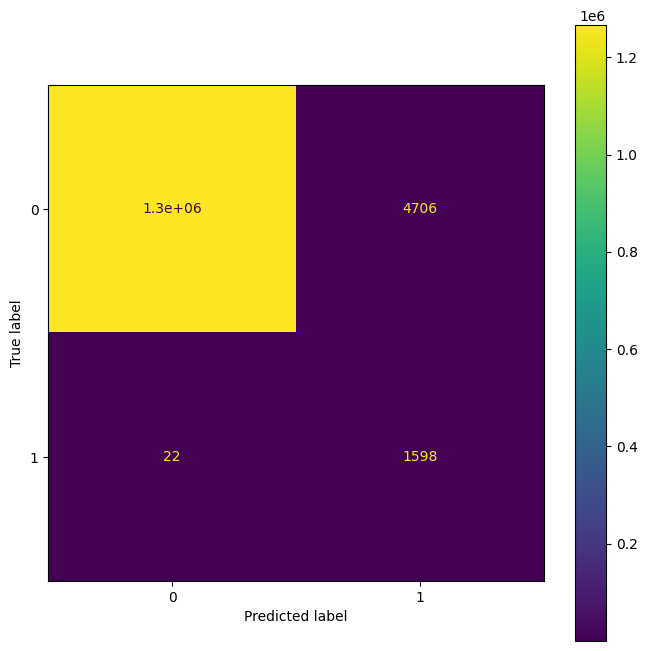

In [46]:
fig, ax = plt.subplots(figsize = (8,8))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds, ax=ax)

We observe that 22 ‘Fraud’ classes has been miss predicted as non-Fraud

In [49]:
#checking the performance of the matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
c_r = (classification_report(y_test, y_preds, digits=4))
print(c_r)

              precision    recall  f1-score   support

           0     1.0000    0.9963    0.9981   1270904
           1     0.2535    0.9864    0.4033      1620

    accuracy                         0.9963   1272524
   macro avg     0.6267    0.9914    0.7007   1272524
weighted avg     0.9990    0.9963    0.9974   1272524



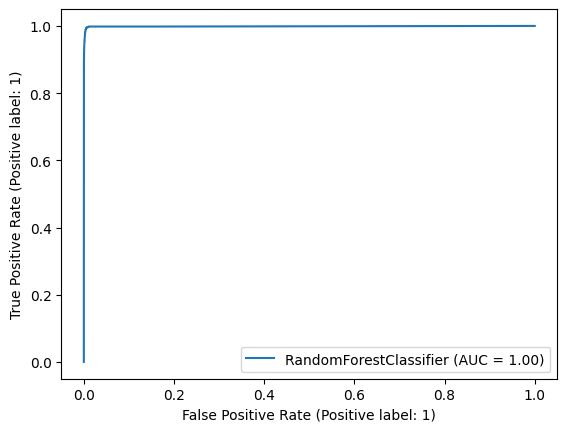

In [67]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)